In [1]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEXMEGA'
CRYPTO_TARGET = 'NONE'

In [2]:
# Compiler
PLATFORM      = 'CWLITEXMEGA' # chipwhispher 보드가 CWLITECEMEGA
CRYPTO_TARGET = 'NONE'
CODE_DIR      = 'C:/Users/01sun/ChipWhisperer5_64/cw/home/portable/chipwhisperer/hardware/victims/firmware/sungbin'

# Captureg
resultFolderName = 'C:/Users/01sun/CPA' # 결과 저장하는 위치
numberOfTraces   = 5000
numberOfPoints   = -1 # Auto setting: -1 (The maximum number of points among 100 traces.)
presamples       = 0  # The number of samples to record from before the trigger event.
fixedPlaintext   = False
fixedMasterKey   = True
initialMasterKey = '59 6f 75 20 52 20 53 43 41 20 4d 61 73 74 65 72'#'2B 7E 15 16 28 AE D2 A6 AB F7 15 88 09 CF 4F 3C' # '47 06 48 08 51 e6 1b e8 5d 74 bf b3 fd 95 61 85'

In [3]:
import matplotlib.pyplot as plt
from datetime import datetime
import chipwhisperer as cw
import numpy as np
import struct
import tqdm
import os

SBox    = np.array([0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76, 0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0, 0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15, 0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75, 0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84, 0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf, 0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8, 0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2, 0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73, 0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb, 0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79, 0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08, 0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a, 0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e, 0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf, 0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16], dtype=np.uint8)

In [4]:
os.makedirs(resultFolderName, exist_ok=True)
plt.rcParams['font.family'] = 'Times New Roman'

currentTime = datetime.now().strftime("%y%m%d_%H%M%S")
fileName = '{}/Trace-result-{}_{}'.format(resultFolderName, PLATFORM, currentTime)
print(fileName)

C:/Users/01sun/CPA/Trace-result-CWLITEXMEGA_240129_130944


In [5]:
%%sh
cd ../../hardware/victims/firmware/sungbin

In [6]:
%%sh -s "$PLATFORM" "$CRYPTO_TARGET"
cd ../../hardware/victims/firmware/sungbin
make PLATFORM=$1 CRYPTO_TARGET=$2

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
avr-gcc (GCC) 11.1.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
    mycrypto3.c ...Done!
.
Compiling:
    .././simpleserial/simpleserial.c ...Done!
.
Compiling:
    .././hal/xmega/XMEGA_AES_driver.c ...Done!
.
Compiling:
    .././hal/xmega/uart.c ...Done!
.
Compiling:
    .././hal/xmega/usart_driver.c ...Done!
.
Compiling:
    .././hal/xmega/xmega_hal.c ...Done!
.
LINKING:
    simpleserial-base-CWLITEXMEGA.elf ...Done!
.
Creating load file for Flash: simpleserial-base-CWLITEXMEGA.hex
avr-objcopy -O ihex -R .eeprom -R .fuse -R .lock -R .signature simpleserial-base-CWLITEXMEGA.elf si

In [7]:
# Setting capture board
scope = cw.scope()
scope.default_setup()
scope.adc.samples     = min(numberOfPoints, 24400) if numberOfPoints > 0 else 24400
scope.adc.presamples  = presamples
scope.clock.clkgen_freq = 7370000
scope.clock.adc_src   = 'clkgen_x4' 
print(scope)

target = cw.target(scope, cw.targets.SimpleSerial)

cwlite Device
sn         = 50203220384d4a543230313135323035
fw_version = 
    major = 0
    minor = 65
    debug = 0
gain = 
    mode = high
    gain = 30
    db   = 24.8359375
adc = 
    state          = False
    basic_mode     = rising_edge
    timeout        = 2
    offset         = 0
    presamples     = 0
    samples        = 24400
    decimate       = 1
    trig_count     = 10958064
    fifo_fill_mode = normal
clock = 
    adc_src       = clkgen_x4
    adc_phase     = 0
    adc_freq      = 63428524
    adc_rate      = 63428524.0
    adc_locked    = True
    freq_ctr      = 0
    freq_ctr_src  = extclk
    clkgen_src    = system
    extclk_freq   = 10000000
    clkgen_mul    = 2
    clkgen_div    = 26
    clkgen_freq   = 7384615.384615385
    clkgen_locked = True
trigger = 
    triggers = tio4
    module   = basic
io = 
    tio1         = serial_rx
    tio2         = serial_tx
    tio3         = high_z
    tio4         = high_z
    pdid         = high_z
    pdic         = high_z


In [8]:
# Programming target board
if "STM" in PLATFORM or PLATFORM == "CWLITEARM" or PLATFORM == "CWNANO":
    prog = cw.programmers.STM32FProgrammer
elif PLATFORM == "CW303" or PLATFORM == "CWLITEXMEGA":
    prog = cw.programmers.XMEGAProgrammer
    
fw_path = '{}/simpleserial-base-{}.hex'.format(CODE_DIR, PLATFORM)

cw.program_target(scope, prog, fw_path)

XMEGA Programming flash...
XMEGA Reading flash...
Verified flash OK, 3053 bytes


In [9]:
# Setting (Plain, Key) generator
keyTextPattern            = cw.ktp.Basic()
keyTextPattern.fixed_text = fixedPlaintext
keyTextPattern.fixed_key  = fixedMasterKey
keyTextPattern.setInitialKey(initialMasterKey)
#keyTextPattern.setInitialText('2B 7E 15 16 28 AE D2 A6 AB F7 15 88 09 CF 4F 3C')

In [10]:
def printHexString(inString):
    outString = ''
    for i in range(15):
        outString += "0x{}, ".format(inString[2*i:2*i+2])
    outString += "0x{}".format(inString[30:])
    return outString

In [11]:
def hexStringToArray(inString):
    output = np.zeros(16, dtype=np.uint8)
    for i in range(16):
        output[i] = int(inString[2*i:2*i+2], 16)
    return output

In [12]:
def AESxtimes(inputData):
    return ((inputData << 1) & 0xFF) ^ ((inputData >> 7) * 0x1b)

def AESshiftRows(state):
    outputState = np.zeros(16, dtype=np.uint8)
    for i in range(16):
        outputState[i] = state[(i + 4 * (i % 4)) % 16]
    return outputState

def AESmixColumns(state):
    outputState = np.zeros(16, dtype=np.uint8)
    for i in range(0, 16, 4):
        outputState[i    ] = AESxtimes(state[i  ] ^ state[i+1]) ^ state[i+1] ^ state[i+2] ^ state[i+3]
        outputState[i + 1] = AESxtimes(state[i+1] ^ state[i+2]) ^ state[i+2] ^ state[i+3] ^ state[i  ]
        outputState[i + 2] = AESxtimes(state[i+2] ^ state[i+3]) ^ state[i+3] ^ state[i  ] ^ state[i+1]
        outputState[i + 3] = AESxtimes(state[i+3] ^ state[i  ]) ^ state[i  ] ^ state[i+1] ^ state[i+2]
    return outputState
        
def AESkeyExpansion(masterKey):
    masterKey = np.array(masterKey, dtype=np.uint8)
    
    rcon        = 1
    roundKey    = np.zeros((11, 16), dtype=np.uint8)
    roundKey[0] = masterKey.copy()
    for roundIndex in range(1, 11):
        roundKey[roundIndex][0] = roundKey[roundIndex - 1][0] ^ SBox[roundKey[roundIndex - 1][13]] ^ rcon
        roundKey[roundIndex][1] = roundKey[roundIndex - 1][1] ^ SBox[roundKey[roundIndex - 1][14]]
        roundKey[roundIndex][2] = roundKey[roundIndex - 1][2] ^ SBox[roundKey[roundIndex - 1][15]]
        roundKey[roundIndex][3] = roundKey[roundIndex - 1][3] ^ SBox[roundKey[roundIndex - 1][12]]
        for i in range(4, 16, 4):
            roundKey[roundIndex][i    ] = roundKey[roundIndex][i - 4] ^ roundKey[roundIndex - 1][i    ]
            roundKey[roundIndex][i + 1] = roundKey[roundIndex][i - 3] ^ roundKey[roundIndex - 1][i + 1]
            roundKey[roundIndex][i + 2] = roundKey[roundIndex][i - 2] ^ roundKey[roundIndex - 1][i + 2]
            roundKey[roundIndex][i + 3] = roundKey[roundIndex][i - 1] ^ roundKey[roundIndex - 1][i + 3]
        rcon = AESxtimes(rcon)
    return roundKey

def AES(plaintext, masterKey):
    plaintext = np.array(plaintext, dtype=np.uint8)
    masterKey = np.array(masterKey, dtype=np.uint8)
    roundKey = AESkeyExpansion(masterKey)

    state = plaintext ^ roundKey[0]
    for roundIndex in range(1, 10):
        state = SBox[state]
        state = AESshiftRows(state)
        state = AESmixColumns(state)
        state ^= roundKey[roundIndex]
    state = SBox[state]
    state = AESshiftRows(state)
    state ^= roundKey[10]
    
    return state

in:  0xa4, 0x00, 0x62, 0xdb, 0x8a, 0x5a, 0x2c, 0x6e, 0x31, 0x48, 0x06, 0xd3, 0xbf, 0x1e, 0x77, 0x0e
key: 0x59, 0x6f, 0x75, 0x20, 0x52, 0x20, 0x53, 0x43, 0x41, 0x20, 0x4d, 0x61, 0x73, 0x74, 0x65, 0x72
out: 0xf4, 0x33, 0x23, 0x54, 0xe2, 0x57, 0x0a, 0x2a, 0xfa, 0x9b, 0x5f, 0x1d, 0x88, 0x2f, 0xeb, 0x9a

in:  0x1d, 0x4c, 0x23, 0x47, 0x00, 0x30, 0x05, 0x85, 0x4b, 0xcf, 0x58, 0x5f, 0x98, 0xc8, 0xea, 0x25
key: 0x59, 0x6f, 0x75, 0x20, 0x52, 0x20, 0x53, 0x43, 0x41, 0x20, 0x4d, 0x61, 0x73, 0x74, 0x65, 0x72
out: 0x25, 0xc1, 0xcf, 0x0c, 0xfe, 0xd8, 0xf4, 0xd2, 0x9e, 0x54, 0xd3, 0xd4, 0x1a, 0x14, 0xdf, 0xc8

Maximum of trigger count: 4376


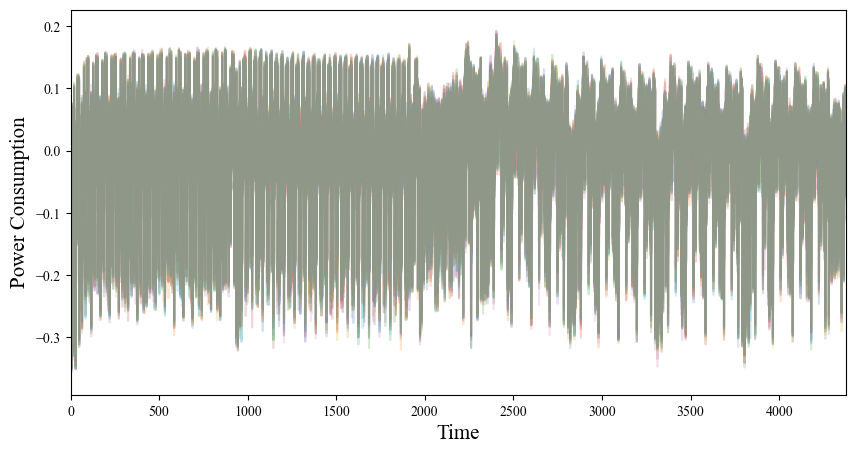

In [13]:
# Check parameters
plt.figure(figsize=(10, 5))
maxNumberOfPoints = 0
for traceIndex in range(100):
    key, text = keyTextPattern.next()
    result = cw.capture_trace(scope, target, text, key)
    if traceIndex < 2:
        print('in:  {}\nkey: {}\nout: {}\n'.format(printHexString(result.textin.hex()), printHexString(result.key.hex()), printHexString(result.textout.hex())))
    if traceIndex < 10:
        plt.plot(result.wave, alpha=0.2)
    if maxNumberOfPoints < scope.adc.trig_count:
        maxNumberOfPoints = scope.adc.trig_count   
    if np.any(AES(hexStringToArray(result.textin.hex()), hexStringToArray(result.key.hex())) != hexStringToArray(result.textout.hex())):
        print('ERROR!!! AES output is not correct!!!\n' * 10)
    
if numberOfPoints < 0:
    scope.adc.samples = maxNumberOfPoints
print("Maximum of trigger count: {}".format(maxNumberOfPoints))

plt.xlim(0, scope.adc.samples-1)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Power Consumption', fontsize=15)
plt.savefig('{}_trace.png'.format(fileName), dpi=300)
plt.show()       

In [14]:
def saveHexFile(inputTxt, fileName):
    npArray = np.empty(shape=(len(inputTxt), 16), dtype=np.uint8)
    for traceIndex in tqdm.tqdm(range(len(inputTxt))):
        for byteIndex in range(16):
            npArray[traceIndex, byteIndex] = int(inputTxt[traceIndex][2*byteIndex:2*(byteIndex+1)], 16)
    np.save(fileName, npArray)

In [15]:
traces  = np.zeros(shape=(numberOfTraces, scope.adc.samples))
inout   = np.empty(shape=(numberOfTraces, 3), dtype='U32')
for index in tqdm.tqdm(range(numberOfTraces)):
    key, text = keyTextPattern.next()
    result = cw.capture_trace(scope, target, text, key)
    if result is None:
        continue
        
    traces[index]   = result.wave 
    inout[index, 0] = result.textin.hex()
    inout[index, 1] = result.textout.hex()
    inout[index, 2] = result.key.hex()
    
inoutFileNames = ['{}_plain.txt'.format(fileName), '{}_cipher.txt'.format(fileName),'{}_keylist.txt'.format(fileName)]

np.save('{}_traces.npy'.format(fileName), traces)
saveHexFile(inout[:, 0], '{}_textin.npy'.format(fileName))
saveHexFile(inout[:, 1], '{}_textout.npy'.format(fileName))
saveHexFile(inout[:, 2], '{}_keylist.npy'.format(fileName))
for fileIndex, currentFileName in enumerate(inoutFileNames):
    with open(currentFileName, 'w') as fp:
        for traceIndex in range(numberOfTraces):
            for byteIndex in range(16):
                fp.write('{} '.format(inout[traceIndex, fileIndex][2*byteIndex:2*byteIndex+2]))
            fp.write('\n')
            
with open('{}_parameters.txt'.format(fileName), 'w') as fp:
    fp.write('Compiler\n')
    fp.write('Platform: {}\n'.format(PLATFORM))
    fp.write('Target Crypt: {}\n'.format(CRYPTO_TARGET))
    fp.write('Code Directory: {}\n'.format(CODE_DIR))
    fp.write('\n')
    
    fp.write('Capture\n')
    fp.write('Number of traces: {}\n'.format(numberOfTraces))
    fp.write('Number of points: {}\n'.format(scope.adc.samples))
    fp.write('Presamples: {}\n'.format(presamples))
    fp.write('Fixed plaintext: {}\n'.format(fixedPlaintext))
    fp.write('Fixed master key: {}\n'.format(fixedMasterKey))
    fp.write('Init master key: {}\n'.format(initialMasterKey))

100%|██████████| 5000/5000 [00:00<00:00, 32225.16it/s]


In [16]:
# Save trace as .trace format
with open('{}.trace'.format(fileName), 'wb') as fp:
    fp.write(fileName.split('/')[-1][:20].ljust(20).encode('ascii'))
    fp.write(struct.pack('i', traces.shape[0]))
    fp.write(struct.pack('i', traces.shape[1]))
    fp.write('END!'.encode('ascii'))
    
    for row in tqdm.tqdm(range(traces.shape[0]) ):
        for col in range(traces.shape[1]):
            fp.write(struct.pack('f', traces[row][col]))

100%|██████████| 5000/5000 [00:28<00:00, 174.17it/s]


In [17]:
with open('{}trace0.txt'.format(fileName), 'wt') as fp:
    for pointIndex in range(traces.shape[1]):
        fp.write('{}\n'.format(traces[0, pointIndex]))
    fp.close()

In [18]:
# Disconneting 
scope.dis()
target.dis()